# Solution Linear Regression

In [1]:
#dependencies
import numpy as np
import pickle
import matplotlib.pyplot as plt

#load data
with open('data/vervoerder.pkl','rb') as f:
    data=pickle.load(f) 

#number observaties (m) and number of features (n)
m,n = data.shape
#inspect data
print(data[1:5])


#setup matrix X, vector y and initial values theta
#first column data is x, second is y
X = np.c_[np.ones(m), data[:, [0]]]
y = data[:, [1]]
theta = np.zeros( (1,2) )
print (theta)

#zorg ervoor dat pyplot inline wordt weergegeven
%matplotlib inline

[[ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]
[[0. 0.]]


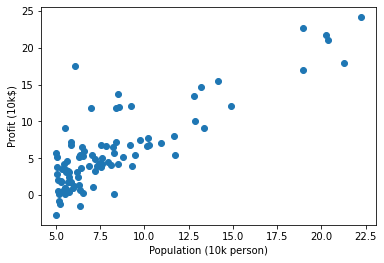

In [2]:
def drawGraph(data):
    x,y = data.T
    plt.scatter(x,y)
    plt.ylabel('Profit (10k$)')
    plt.xlabel('Population (10k person)') 
    plt.show()

drawGraph(data)

In [5]:

def computeCost(X, y, theta):
    m,n = X.shape
    predictions = np.dot(X, theta.T)
    errors = (predictions - y) ** 2
    J = (1/(2*m)) * sum(errors)[0]

    return J

J = computeCost(X, y, theta)
print (f"Found J: {J:.4f}.")
print ("This should be around 32.07 ")

Found J: 32.0727.
This should be around 32.07 


In [6]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m,n = X.shape
    costs = [] 
    for _ in range(num_iters):
        h = np.dot(X, theta.T)
        loss = h - y
        grad = np.dot(X.T, loss) / m
        theta = theta - grad.T * alpha
        costs.append(computeCost(X, y, theta)) 

    return theta[0], costs

alpha = 0.01
num_iters = 1500
theta = np.zeros( (1,2) )
print (theta.shape)
print(f"inital cost {computeCost(X, y, theta):.2f}")

theta, costs = gradientDescent(X, y, theta, alpha, num_iters) 

print(f"cost after 1 step: {costs[0]:.2f}")
print(f"final cost: {costs[num_iters-1]:.2f}")

print(f"theta={theta}")
print("This should be (-3.63, 1.16)");

(1, 2)
inital cost 32.07
cost after 1 step: 6.74
final cost: 4.48
theta=[-3.63029144  1.16636235]
This should be (-3.63, 1.16)


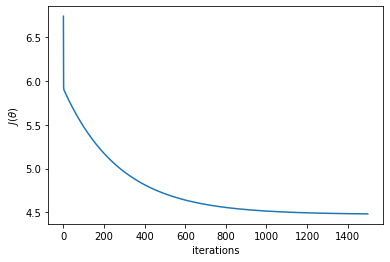

In [7]:
def drawCosts(costs): 
    x = np.arange(len(costs))
    plt.plot(x, costs)
    plt.ylabel(r'$J(\theta)$')
    plt.xlabel('iterations')
    plt.show()
    
drawCosts(costs)